In [5]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats
from scipy.stats             import ttest_1samp,ttest_ind, wilcoxon
from statsmodels.stats.power import ttest_power
insurance=pd.read_csv('insurance.csv')

In [3]:
insurance

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520
...,...,...,...,...,...,...,...
1333,50,male,30.970,3,no,northwest,10600.54830
1334,18,female,31.920,0,no,northeast,2205.98080
1335,18,female,36.850,0,no,southeast,1629.83350
1336,21,female,25.800,0,no,southwest,2007.94500


# Perform basic EDA which should include the following and print out your insights at every step

In [3]:
#size of data
insurance.size

9366

In [4]:
#shape of  data
insurance.shape

(1338, 7)

In [5]:
#dimension of data
insurance.ndim

2

In [ ]:
# data has 7 columns and 1338 rows

In [13]:
# dtype for each attribute
insurance.dtypes

age           int64
sex          object
bmi         float64
children      int64
smoker       object
region       object
charges     float64
dtype: object

In [18]:
# Checking the presence of missing values
pd.DataFrame(insurance.isnull().sum(),columns=['Missing'])

,Missing
age,0
sex,0
bmi,0
children,0
smoker,0
region,0
charges,0


In [20]:
insurance.any()

age         True
sex         True
bmi         True
children    True
smoker      True
region      True
charges     True
dtype: bool

In [21]:
insurance.isnull().sum()

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

In [ ]:
#There are no Null values in the data

# 5 point summary of numerical attributes

In [26]:
from numpy import percentile
# calculate quartiles
quartiles = percentile(insurance['charges'], [25, 50, 75])

# calculate min/max
insurance_min, insurance_max,insurance_mean  = insurance['charges'].min(), insurance['charges'].max(), insurance['charges'].mean()

# print 5-number summary
print('Min: %.3f' % insurance_min)
print('Q1: %.3f' % quartiles[0])
print('Median: %.3f' % quartiles[1])
print('Q3: %.3f' % quartiles[2])
print('Max: %.3f' % insurance_max)


Min: 1121.874
Q1: 4740.287
Median: 9382.033
Q3: 16639.913
Max: 63770.428


In [27]:
print('Mean: %.3f' % insurance_mean)

Mean: 13270.422


# Distribution of ‘bmi’, ‘age’ and ‘charges’ columns.

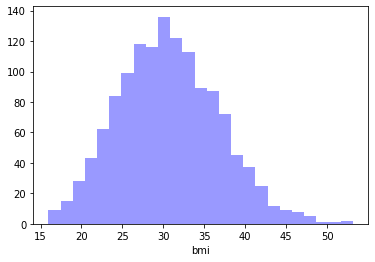

In [10]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
sns.distplot(insurance['bmi'],kde=False, color="b")

In [ ]:
#Distribution of BMI is Normal

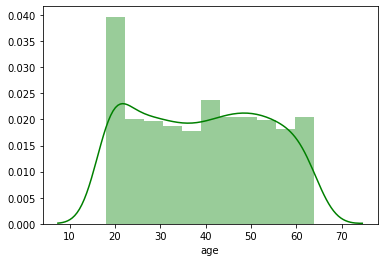

In [12]:
sns.distplot(insurance['age'], color="g")

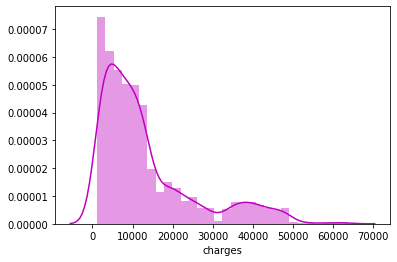

In [13]:
sns.distplot(insurance['charges'], color="m")

In [ ]:
#Distribution is Normal but is right skewed an also has Cluster

# Checking the presence of outliers in ‘bmi’, ‘age’ and ‘charges columns

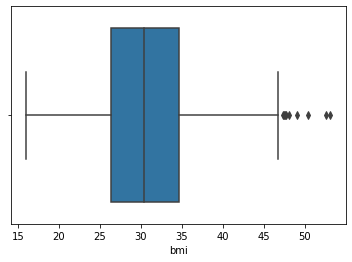

In [14]:
sns.boxplot(x=insurance['bmi'])

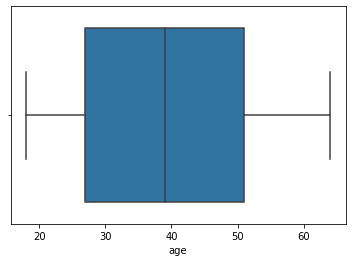

In [15]:
sns.boxplot(x=insurance['age'])

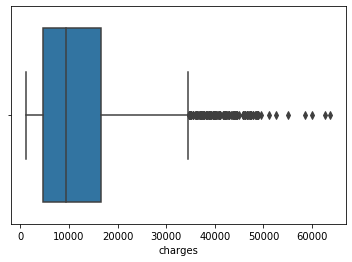

In [6]:
sns.boxplot(x=insurance['charges'])

In [ ]:
# BMI has few outliers
# Age data do not have any outliers
# Charges data has multiple outliers

# Distribution of categorical columns (include children)

The type of plots which can be used here in our project are 
Bar plot
Count Plot
Box Plot
Violin Plot
Strip Plot
Swarm Plot

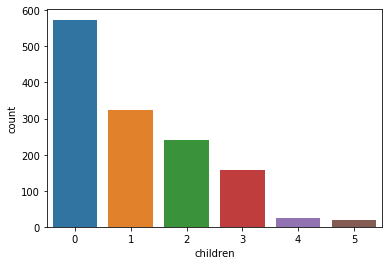

In [11]:
sns.countplot(x='children',data=insurance)

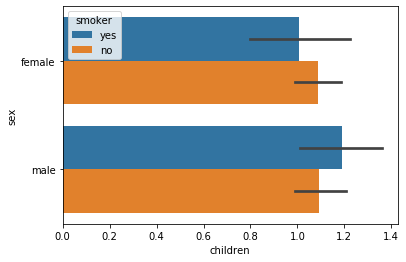

In [12]:
sns.barplot(x='children', y='sex', data=insurance,hue='smoker')

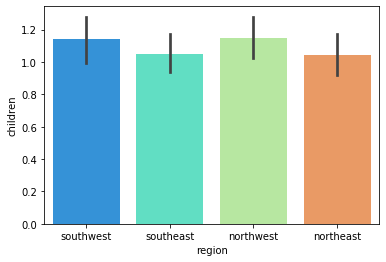

In [19]:
sns.barplot(x='region', y='children', data=insurance,palette='rainbow')

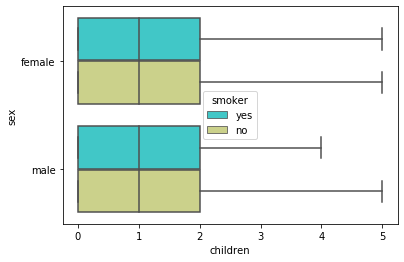

In [21]:
sns.boxplot(x='children',y='sex',data=insurance, palette='rainbow',hue='smoker')

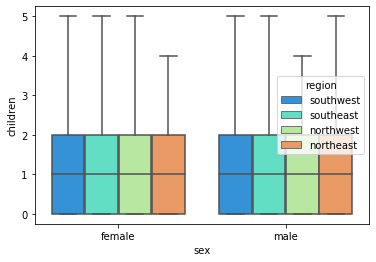

In [23]:
sns.boxplot(x='sex',y='children',data=insurance, palette='rainbow',hue='region')

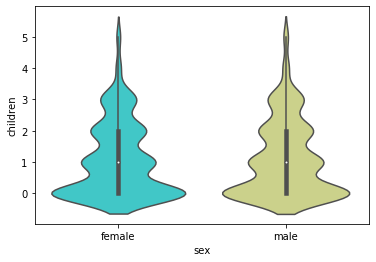

In [25]:
sns.violinplot(x="sex", y="children", data=insurance,palette='rainbow')

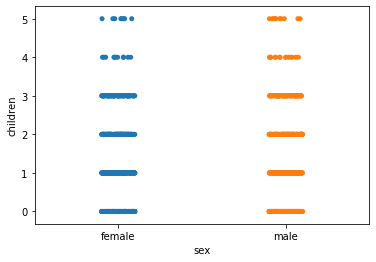

In [27]:
sns.stripplot(x="sex", y="children", data=insurance)

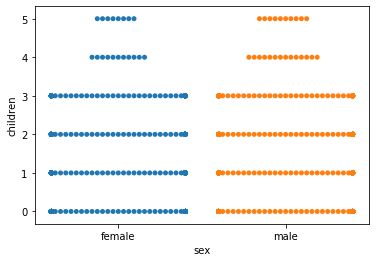

In [33]:
sns.swarmplot(x="sex", y="children", data=insurance)

# Pair plot that includes all the columns of the data frame

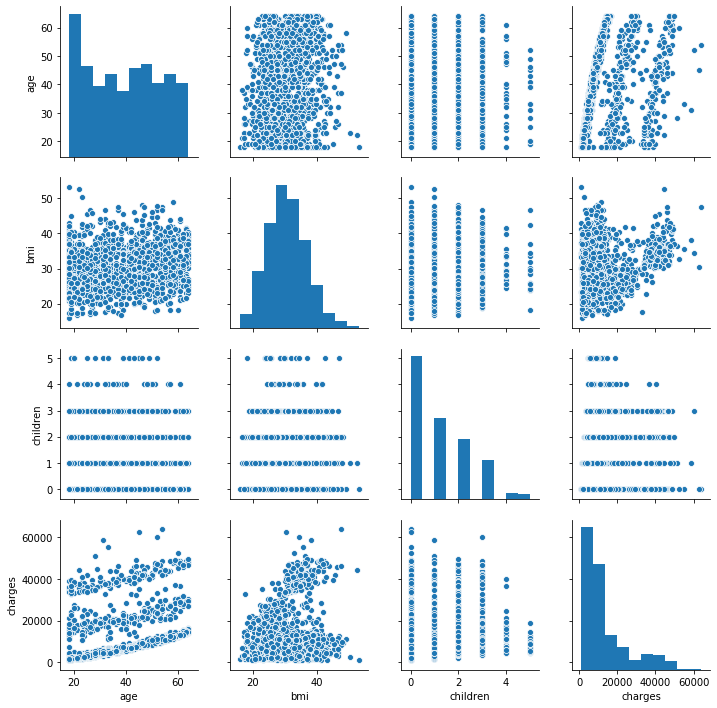

In [3]:
sns.pairplot(insurance)

In [10]:
insurance.dtypes

age           int64
sex          object
bmi         float64
children      int64
smoker       object
region       object
charges     float64
dtype: object

# Do charges of people who smoke differ significantly from the people who don't?

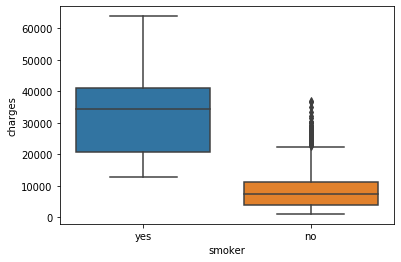

In [39]:
sns.boxplot(x='smoker',y='charges',data=insurance)

In [ ]:
#From a simple EDA analysis it is evident that the charges for Smokers are significantly higher than for non-smokers

In [52]:
#Ho : There is no significant difference in charges between smoker and non-smoker charges
#Ha : There is significant sifference in charges between smoker and non-smoker
smoker=insurance.loc[insurance['smoker']=='yes',['charges']]
non_smoker=insurance.loc[insurance['smoker']=='no',['charges']]
from    scipy.stats             import  ttest_1samp,ttest_ind, wilcoxon, ttest_ind_from_stats
import  scipy.stats             as      stats  
from    statsmodels.stats.power import  ttest_power
import  matplotlib.pyplot       as      plt
t_statistic, p_value  = stats.ttest_ind(smoker,non_smoker)
print(p_value)

[8.27143584e-283]


In [ ]:
# Since p-value is lower than 0.05, Ha gets accepted
# There is significant sifference in charges between smoker and non-smo

# Does bmi of males differ significantly from that of females?

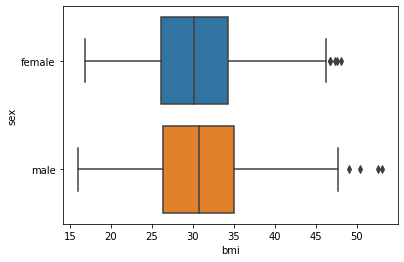

In [53]:
#Ho: BMI of males and females does not differ significantly
#Ha: BMI of males and females differ significantly

# We will first use EDA to check whether we are able to get our answer from EDA
sns.boxplot(x='bmi',y='sex',data=insurance)

In [54]:
# as per the EDA analysis the difference is not significant and hence now we will use Hypothesis testing to find out the sigificance level
# since the samples are independent and we have 2 samples, we will use 2 sample t-test
bmi_male=insurance.loc[insurance['sex']=='male',['bmi']]
bmi_female=insurance.loc[insurance['sex']=='female',['bmi']]
t_statistic, p_value  = stats.ttest_ind(bmi_male,bmi_female)
print(p_value)

[0.08997637]


In [ ]:
#Since p-value is > 0.05, hence it is confirmed that there is no significant difference between the BMI of male and female
# Hence we accept Null Hypothesis Ho. 

# Is the proportion of smokers significantly different in different genders?

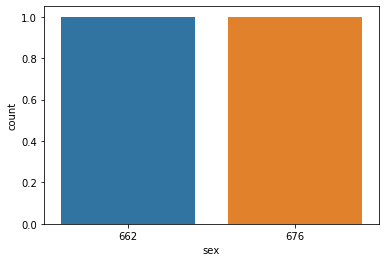

In [74]:
#We will use EDA first to check for the difference
sns.countplot(insurance['sex'].value_counts())

In [87]:
# As per the EDA difference in the proportion is not significant
# Hence we now have to use hypothesis testing to validate the significance of proportions
# Since both the data are categorical we will be using t test to validate the significance of difference

#Ho: Proportion of smokers is not significantly different in different genders
#Ha: Proportion of smokers is significantly different in different genders
count_male=insurance.loc[insurance['sex']=='male',['sex']].count()
count_female=insurance.loc[insurance['sex']=='female',['sex']].count()
p_male=count_male/insurance['smoker'].count()
p_female=count_female/insurance['smoker'].count()
population1 = np.random.binomial(1, p_male, count_male)
population2 = np.random.binomial(1, p_female, count_female)
t_statistic, p_value  = stats.ttest_ind(population1,population2)
print(p_value)

0.9292342426283585


In [ ]:
# Since p-value is > 0.05, Ho is accepted
# It is confirmed that Proportion of smokers is not significantly different in different genders

# Is the distribution of bmi across women with no children, one child and two children, the same ?

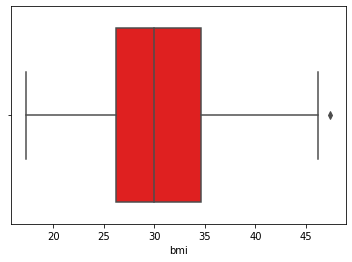

In [107]:
bmi_women_0_child=insurance.loc[((insurance['sex']=='female') & (insurance['children']==0)),['bmi']]
bmi_women_1_child=insurance.loc[((insurance['sex']=='female') & (insurance['children']==1)),['bmi']] 
bmi_women_2_children=insurance.loc[((insurance['sex']=='female') & (insurance['children']==2)),['bmi']]

# We use EDA initially to check if the 
sns.boxplot(x='bmi',data=bmi_women_0_child,color='r')

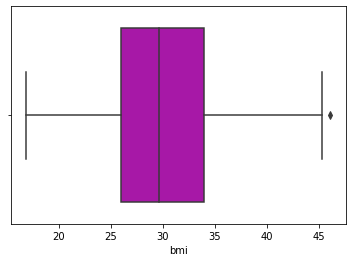

In [99]:
sns.boxplot(x='bmi',data=bmi_women_1_child, color='m')


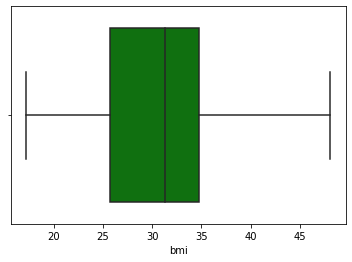

In [100]:
sns.boxplot(x='bmi',data=bmi_women_2_children, color='g')

In [104]:
df=bmi_women_0_child.append(bmi_women_1_child)

In [105]:
df=df.append(bmi_women_2_children)
df

,bmi
0,27.900
5,25.740
9,25.840
11,26.290
13,39.820
...,...
1313,34.700
1319,26.315
1323,40.370
1328,24.225


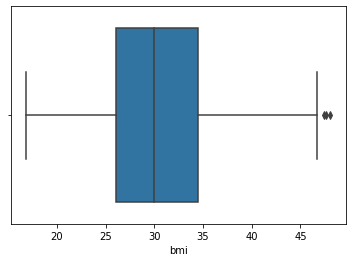

In [106]:
sns.boxplot(x='bmi',data=df)

In [ ]:
# We now use hypothesis testing to confirm the significance
# Ho: BMI sample of women with no child, women with 1 child and women with 2 children have same population mean
# Ha: BMI sample of women with no child, women with 1 child and women with 2 children have different population mean
# Since there are more than 2 samples we use 1 way ANOVA to do the hypothesis testing

In [108]:
import statsmodels.api         as     sm
from   statsmodels.formula.api import ols
from   statsmodels.stats.anova import anova_lm
stats.f_oneway(bmi_women_0_child, bmi_women_1_child, bmi_women_2_children)


F_onewayResult(statistic=array([0.33447201]), pvalue=array([0.71585799]))

In [ ]:
#Since p-value for the test is >0.05, null hypothese is accepted
# BMI distribution of women with no child, women with 1 child and women with 2 children have same population mean
# and hence the distributions are same